In [27]:
import pandas as pd

In [28]:
data = pd.read_csv("Data/Advertising.csv", index_col='Unnamed: 0')
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [29]:
data.shape

(200, 4)

In [30]:
import seaborn as sns

%matplotlib inline

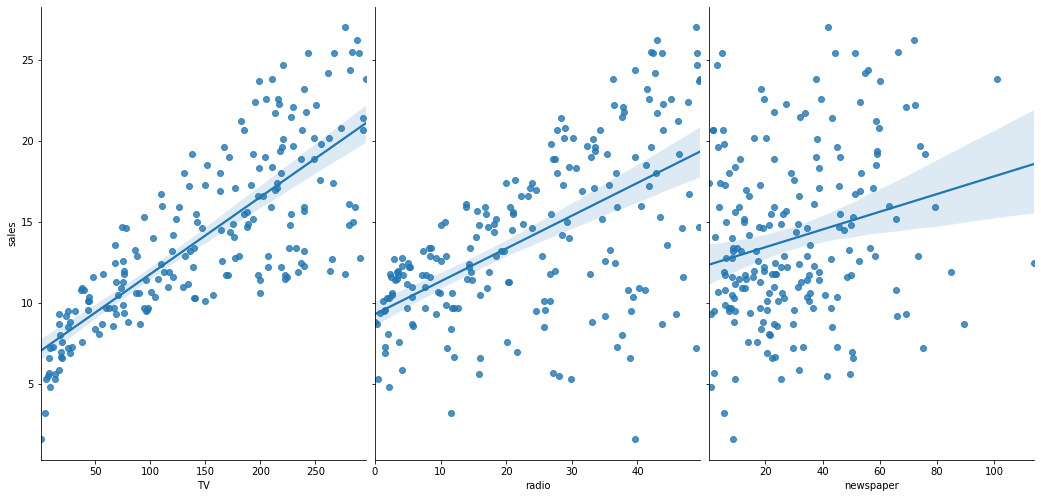

In [31]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars="sales", height=7, aspect=0.7, kind='reg')

# Preparing pandas

In [32]:
feature_cols = ['TV', 'radio', 'newspaper']
# Create a dataframe with only our feature columns
X = data[feature_cols]

X.head()


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [33]:
y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [36]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [39]:
print(list(zip(feature_cols, linreg.coef_)))

[('TV', 0.04656456787415028), ('radio', 0.17915812245088839), ('newspaper', 0.0034504647111804412)]


In [42]:
y_pred = linreg.predict(X_test)

In [43]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


In [44]:
print(metrics.mean_squared_error(true, pred))

150.0


In [46]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


In [47]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328957


In [55]:
feature_col = ['TV', 'radio']

X = data[feature_col]

y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


# Parameter Tuning

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(scores)
print(scores.mean())

[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
0.9666666666666666


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validation Accuracy')

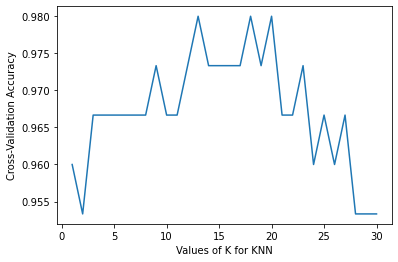

In [71]:
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("Values of K for KNN")
plt.ylabel("Cross-Validation Accuracy")

In [74]:
from sklearn.model_selection import GridSearchCV

In [76]:
k_range = range(1,31)
print(k_range)

range(1, 31)


In [80]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(1, 31)}


In [85]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs = -1)

In [86]:
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [87]:
grid.cv_results_

{'mean_fit_time': array([0.00089252, 0.00099225, 0.0007935 , 0.00069451, 0.00059495,
        0.00069406, 0.00059524, 0.00049601, 0.0003968 , 0.00044639,
        0.00044641, 0.00029762, 0.00034721, 0.00034716, 0.00049593,
        0.00049591, 0.00064468, 0.00049601, 0.00054519, 0.00059552,
        0.0003967 , 0.00034709, 0.00054579, 0.00049608, 0.00059519,
        0.00044644, 0.00054567, 0.00044637, 0.00034714, 0.00049601]),
 'std_fit_time': array([1.99200920e-04, 2.21938650e-04, 5.95148505e-04, 2.42851671e-04,
        1.98197845e-04, 3.28612552e-04, 2.97618079e-04, 2.86102295e-07,
        1.98400133e-04, 1.48797112e-04, 1.48805025e-04, 2.43004072e-04,
        2.27301678e-04, 2.27270451e-04, 2.21778020e-04, 2.61174468e-07,
        2.27359012e-04, 3.40529844e-07, 2.66804666e-04, 2.97405056e-04,
        1.98352980e-04, 2.27223658e-04, 2.67003173e-04, 3.20759393e-07,
        1.98316889e-04, 2.67122590e-04, 2.67025127e-04, 1.48789156e-04,
        2.27254932e-04, 5.24520874e-07]),
 'mean_scor

In [88]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [90]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)
